## Нормализованный датасет

In [30]:
import os
import pandas as pd

os.chdir('../../../')

In [29]:
df_normalized = pd.read_csv('data/lmsys-chat-1m/processed/features_normalized.csv',)

### Матрица корреляции

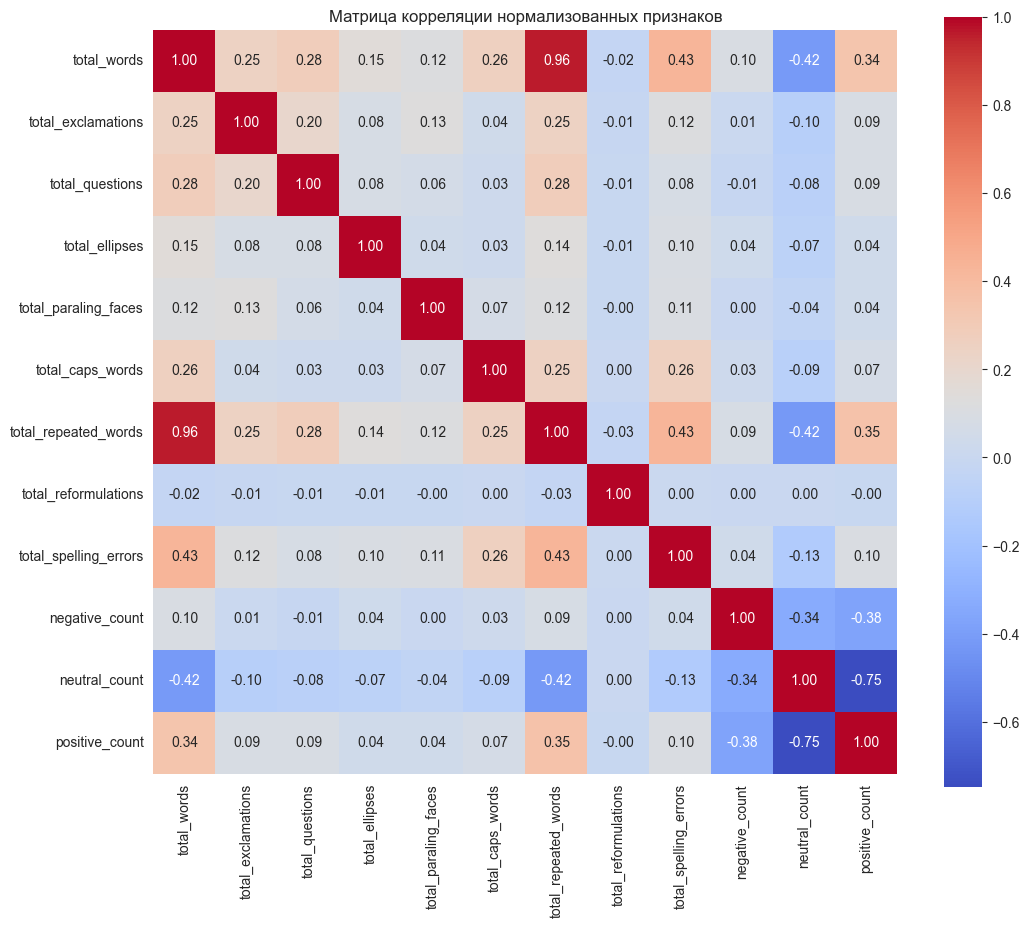

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    col for col in df_normalized.columns
    if col != 'user_id' and pd.api.types.is_numeric_dtype(df_normalized[col])
]

# Строим матрицу корреляции
corr_matrix = df_normalized[numeric_cols].corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Матрица корреляции нормализованных признаков")
plt.show()


### Уберем признаки с сильной корреляцией

In [32]:
df_normalized.drop(['total_repeated_words'], inplace=True, axis=1)
# df_normalized.drop(['neutral_count'], inplace=True, axis=1)


### Подготовка данных

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = df_normalized.drop(columns=['user_id'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Находим оптимальное число кластеров по методу локтя

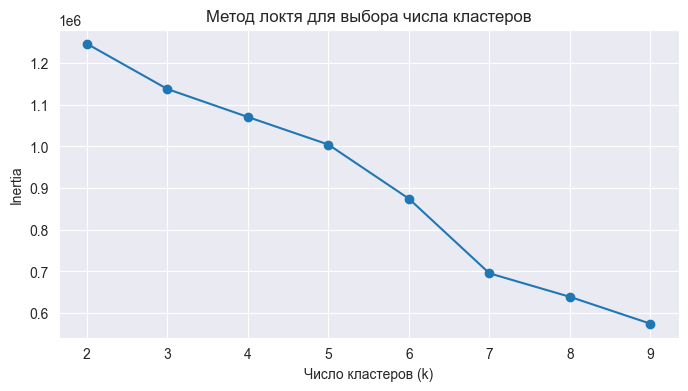

In [34]:
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Метод локтя для выбора числа кластеров")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

### Обучение модели для k=5

In [35]:
k = 5

kmeans_5 = KMeans(n_clusters=k, random_state=42, verbose=True)
kmeans_labels_5 = kmeans_5.fit_predict(X_scaled)

df_kmeans_clusters_5 = df_normalized[['user_id']].copy()
df_kmeans_clusters_5['kmeans_cluster'] = kmeans_labels_5

sil_score = silhouette_score(X_scaled, df_kmeans_clusters_5['kmeans_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")


Initialization complete
Iteration 0, inertia 1188145.8119739091.
Iteration 1, inertia 1018560.028568177.
Iteration 2, inertia 1012443.2984989176.
Iteration 3, inertia 1008400.0879921308.
Iteration 4, inertia 1006605.100252614.
Iteration 5, inertia 1005433.6375367963.
Iteration 6, inertia 1004967.5035490375.
Iteration 7, inertia 1004791.0330731589.
Iteration 8, inertia 1004672.4992127.
Iteration 9, inertia 1004583.402114298.
Iteration 10, inertia 1004546.420078417.
Iteration 11, inertia 1004537.3743728945.
Iteration 12, inertia 1004536.0602741733.
Converged at iteration 12: strict convergence.
Silhouette Score: 0.445


### Обучение модели для k=6

In [36]:
k = 6

kmeans_6 = KMeans(n_clusters=k, random_state=42, verbose=True)
kmeans_labels_6 = kmeans_6.fit_predict(X_scaled)

df_kmeans_clusters_6 = df_normalized[['user_id']].copy()
df_kmeans_clusters_6['kmeans_cluster'] = kmeans_labels_6

sil_score = silhouette_score(X_scaled, df_kmeans_clusters_6['kmeans_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

Initialization complete
Iteration 0, inertia 1044978.4876872061.
Iteration 1, inertia 887610.0329359464.
Iteration 2, inertia 882091.9168587861.
Iteration 3, inertia 878283.6451372403.
Iteration 4, inertia 876655.4570978463.
Iteration 5, inertia 875568.620825568.
Iteration 6, inertia 875070.9713806363.
Iteration 7, inertia 874926.1590305709.
Iteration 8, inertia 874769.1556183179.
Iteration 9, inertia 874719.5255899746.
Iteration 10, inertia 874672.8063054148.
Iteration 11, inertia 874644.4133105611.
Iteration 12, inertia 874639.9865294291.
Iteration 13, inertia 874639.0850365795.
Converged at iteration 13: center shift 2.9084678845254623e-07 within tolerance 9.999999999996584e-05.
Silhouette Score: 0.407


### Обучение модели для k=7

In [42]:
k = 7

kmeans_7 = KMeans(n_clusters=k, random_state=42, verbose=True)
kmeans_labels_7 = kmeans_7.fit_predict(X_scaled)

df_kmeans_clusters_7 = df_normalized[['user_id']].copy()
df_kmeans_clusters_7['kmeans_cluster'] = kmeans_labels_7

sil_score = silhouette_score(X_scaled, df_kmeans_clusters_7['kmeans_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

Initialization complete
Iteration 0, inertia 809944.4755701289.
Iteration 1, inertia 708961.7994063977.
Iteration 2, inertia 705086.909135104.
Iteration 3, inertia 701843.5550057063.
Iteration 4, inertia 699928.1081079998.
Iteration 5, inertia 698929.0003952683.
Iteration 6, inertia 698313.353612916.
Iteration 7, inertia 697987.5086400902.
Iteration 8, inertia 697685.25316002.
Iteration 9, inertia 697457.120820212.
Iteration 10, inertia 697362.3300140098.
Iteration 11, inertia 697333.2912361281.
Iteration 12, inertia 697306.6603528621.
Iteration 13, inertia 697254.8698536137.
Iteration 14, inertia 697068.9506535789.
Iteration 15, inertia 696873.6224243446.
Iteration 16, inertia 696510.0648674229.
Iteration 17, inertia 696212.9946061971.
Iteration 18, inertia 696130.1361196002.
Iteration 19, inertia 695766.8858609763.
Iteration 20, inertia 695608.7199737579.
Iteration 21, inertia 695573.5275615884.
Converged at iteration 21: center shift 7.785071892913285e-05 within tolerance 9.99999999

### Визуализация для k=5

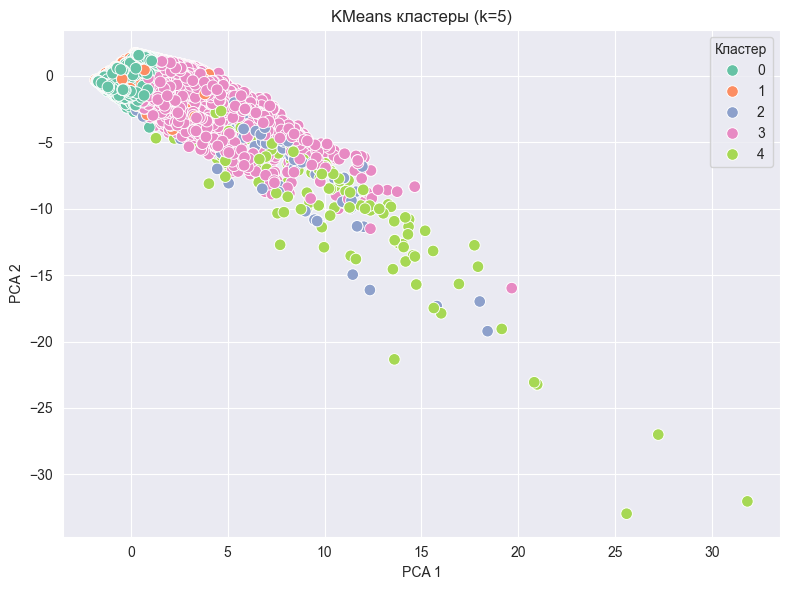

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_kmeans_vis_5 = df_kmeans_clusters_5.copy()
df_kmeans_vis_5['pca1'] = X_pca[:, 0]
df_kmeans_vis_5['pca2'] = X_pca[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans_vis_5,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',
    palette='Set2',
    s=70
)
plt.title(f"KMeans кластеры (k=5)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()


### Визуализация для k=6

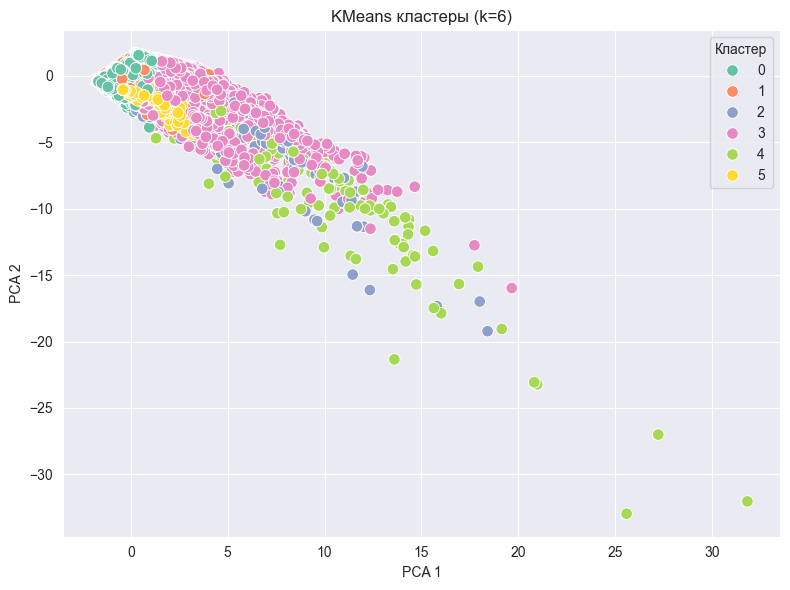

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_kmeans_vis_6 = df_kmeans_clusters_6.copy()
df_kmeans_vis_6['pca1'] = X_pca[:, 0]
df_kmeans_vis_6['pca2'] = X_pca[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans_vis_6,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',
    palette='Set2',
    s=70
)
plt.title(f"KMeans кластеры (k=6)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()


### Визуализация для k=7

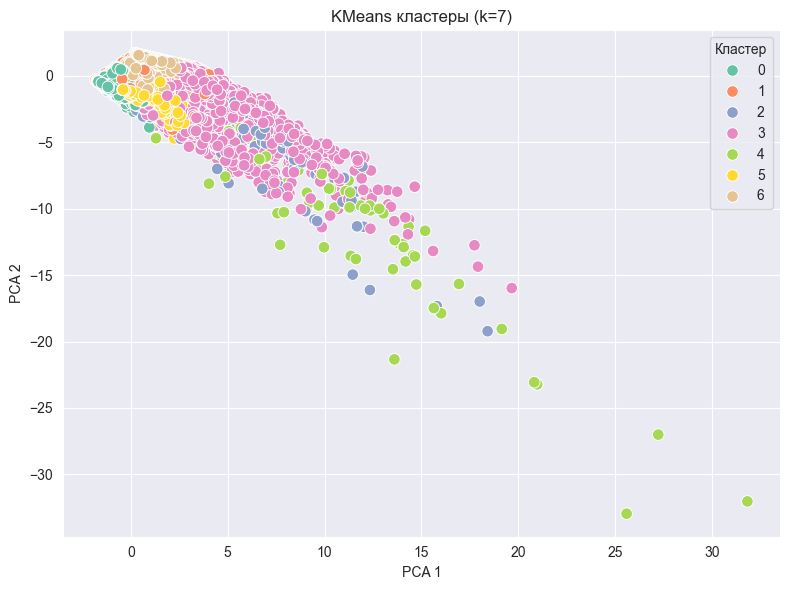

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_kmeans_vis_7 = df_kmeans_clusters_7.copy()
df_kmeans_vis_7['pca1'] = X_pca[:, 0]
df_kmeans_vis_7['pca2'] = X_pca[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans_vis_7,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',
    palette='Set2',
    s=70
)
plt.title(f"KMeans кластеры (k=7)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()
